# Генерация дополнительных строковых фичей.

## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL-записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Построение признаков из строк

1. Загрузим датасет из `data/vehicles_dataset_upd6.csv`, выведем первые 5 записей.

In [3]:
df = pd.read_csv('data/vehicles_dataset_upd6.csv')
df.head(5)

id                                                url  \
0  7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1  7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2  7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3  7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4  7303797340  https://knoxville.craigslist.org/ctd/d/knoxvil...   

         region                           region_url  price  year  \
0   chattanooga   https://chattanooga.craigslist.org  54990  2020   
1  north jersey     https://newjersey.craigslist.org  16942  2016   
2  reno / tahoe          https://reno.craigslist.org  35590  2017   
3  fayetteville  https://fayetteville.craigslist.org  14500  2013   
4     knoxville     https://knoxville.craigslist.org  14590  2012   

  manufacturer                   model    fuel  odometer  ... is_jeep  \
0          ram  2500 crew cab big horn  diesel     27442  ...       0   
1         ford    explorer 4wd 4dr xlt   other     60023  ...       0   
2   volkswagen        golf r hatchback     gas     14048  ...       0   
3       toyota                    rav4     gas    117291  ...       0   
4          bmw  1 series 128i coupe 2d   other     80465  ...       0   

  is_honda is_nissan x0_diesel x0_electric  x0_gas  x0_hybrid x0_other  \
0        0         0       1.0         0.0     0.0        0.0      0.0   
1        0         0       0.0         0.0     0.0        0.0      1.0   
2        0         0       0.0         0.0     1.0        0.0      0.0   
3        0         0       0.0         0.0     1.0        0.0      0.0   
4        0         0       0.0         0.0     0.0        0.0      1.0   

  std_scaled_odometer std_scaled_price  
0           -1.079390         2.958509  
1           -0.560115        -0.085826  
2           -1.292863         1.406256  
3            0.352621        -0.281218  
4           -0.234311        -0.274017  

[5 rows x 45 columns]

Выведем список значений и количество уникальных значений для модели автомобиля.

In [4]:
df.model.unique()

array(['2500 crew cab big horn', 'explorer 4wd 4dr xlt',
       'golf r hatchback', ..., 'gs350', '1988 Nisan',
       'a3 2.0t premium plus pzev'], dtype=object)

In [5]:
len(df.model.unique())

3341

In [6]:
df.model.nunique()

3341

Количество уникальных значений велико. Попробуем их сократить, оставив только первое слово в наименовании модели. С помощью lambda-функции и преобразования над строками создайте новый признак short_model, содержащий только первое слово из наименования модели, выведите его и количество получившихся уникальных значений.

In [7]:
df['short_model'] = df.model.apply(lambda x: x.split(' ')[0])
df['short_model']

0           2500
1       explorer
2           golf
3           rav4
4              1
          ...   
9614        rav4
9615    wrangler
9616          a3
9617     cayenne
9618        1500
Name: short_model, Length: 9619, dtype: object

### Преобразование категориальных переменных

1. Для категориальных переменных `short_model`, `transmission`, `region`, `manufacturer`, `state`, `title_status`, `age_category` распечатаем наименование категории и количество уникальных значений в ней.

In [8]:
df[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']].nunique()

short_model     943
transmission      3
region          393
manufacturer     40
state            51
title_status      6
age_category      3
dtype: int64

Создадим датафрейм `data`, содержащий только выбранные категориальные переменные.

In [9]:
data2 = pd.DataFrame()

In [10]:
data2 = df[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']]
data2.head(5)

short_model transmission        region manufacturer state title_status  \
0        2500        other   chattanooga          ram    tn        clean   
1    explorer    automatic  north jersey         ford    nj        clean   
2        golf        other  reno / tahoe   volkswagen    ca        clean   
3        rav4    automatic  fayetteville       toyota    nc        clean   
4           1        other     knoxville          bmw    tn        clean   

  age_category  
0          new  
1          new  
2          new  
3      average  
4      average

Создим объект класса OneHotEncoder, который будет отвечать за преобразование. Уточним, что на выходе должна быть неразреженная матрица.

In [11]:
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

Идентифицируем параметры преобразования на датафрейме с категориальными переменными.

In [12]:
print(len(data2.short_model.unique()))
print(len(data2.short_model))

943
9619


In [13]:
ohe.fit(data2[['transmission','region','manufacturer','state','title_status','age_category']])

OneHotEncoder(sparse=False)

Применим преобразование для датафрейма с категориальными переменными и сохраните в новую переменную, распечатаем получившуюся матрицу и её размерность.

In [14]:
ohe_model = ohe.transform(data2[['transmission','region','manufacturer','state','title_status','age_category']])
ohe_model

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

Выведем новые наименования признаков с помощью метода get_feature_names_out

In [15]:
ohe.inverse_transform(ohe_model)

array([['other', 'chattanooga', 'ram', 'tn', 'clean', 'new'],
       ['automatic', 'north jersey', 'ford', 'nj', 'clean', 'new'],
       ['other', 'reno / tahoe', 'volkswagen', 'ca', 'clean', 'new'],
       ...,
       ['automatic', 'salem', 'audi', 'or', 'clean', 'average'],
       ['automatic', 'madison', 'porsche', 'wi', 'clean', 'new'],
       ['other', 'norfolk / hampton roads', 'ram', 'va', 'clean', 'new']],
      dtype=object)

In [16]:
ohe.get_feature_names()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_automatic', 'x0_manual', 'x0_other', 'x1_SF bay area',
       'x1_abilene', 'x1_akron / canton', 'x1_albany', 'x1_albuquerque',
       'x1_altoona-johnstown', 'x1_amarillo', 'x1_ames',
       'x1_anchorage / mat-su', 'x1_ann arbor', 'x1_annapolis',
       'x1_appleton-oshkosh-FDL', 'x1_asheville', 'x1_ashtabula',
       'x1_athens', 'x1_atlanta', 'x1_auburn', 'x1_augusta', 'x1_austin',
       'x1_bakersfield', 'x1_baltimore', 'x1_baton rouge',
       'x1_battle creek', 'x1_beaumont / port arthur', 'x1_bellingham',
       'x1_bemidji', 'x1_bend', 'x1_billings', 'x1_binghamton',
       'x1_birmingham', 'x1_bismarck', 'x1_bloomington',
       'x1_bloomington-normal', 'x1_boise', 'x1_boone', 'x1_boston',
       'x1_boulder', 'x1_bowling green', 'x1_bozeman', 'x1_brainerd',
       'x1_brownsville', 'x1_brunswick', 'x1_buffalo', 'x1_butte',
       'x1_cape cod / islands', 'x1_catskills', 'x1_cedar rapids',
       'x1_central NJ', 'x1_central louisiana', 'x1_central michigan',
    

Добавим в исходный датафрейм получившиеся новые признаки, выведите первые 5 записей датафрейма и список колонок

In [18]:
data2[ohe.get_feature_names()] = ohe_model
data2.head(5)

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/2628572617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[ohe.get_feature_names()] = ohe_model
/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/2628572617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[ohe.get_feature_names()] = ohe_model
/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/2628572617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/2628572617.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2[ohe.get_feature_names()] = ohe_model
/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/2628572617.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2[ohe.get_feature_names()] = ohe_model
/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/2628572617.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

short_model transmission        region manufacturer state title_status  \
0        2500        other   chattanooga          ram    tn        clean   
1    explorer    automatic  north jersey         ford    nj        clean   
2        golf        other  reno / tahoe   volkswagen    ca        clean   
3        rav4    automatic  fayetteville       toyota    nc        clean   
4           1        other     knoxville          bmw    tn        clean   

  age_category  x0_automatic  x0_manual  x0_other  ...  x3_wy  x4_clean  \
0          new           0.0        0.0       1.0  ...    0.0       1.0   
1          new           1.0        0.0       0.0  ...    0.0       1.0   
2          new           0.0        0.0       1.0  ...    0.0       1.0   
3      average           1.0        0.0       0.0  ...    0.0       1.0   
4      average           0.0        0.0       1.0  ...    0.0       1.0   

   x4_lien  x4_missing  x4_parts only  x4_rebuilt  x4_salvage  x5_average  \
0      0.0         0.0            0.0         0.0         0.0         0.0   
1      0.0         0.0            0.0         0.0         0.0         0.0   
2      0.0         0.0            0.0         0.0         0.0         0.0   
3      0.0         0.0            0.0         0.0         0.0         1.0   
4      0.0         0.0            0.0         0.0         0.0         1.0   

   x5_new  x5_old  
0     1.0     0.0  
1     1.0     0.0  
2     1.0     0.0  
3     0.0     0.0  
4     0.0     0.0  

[5 rows x 503 columns]

Посмотрим на результат обратного преобразования получившейся матрицы в исходные признаки, используем inverse_transform.

In [19]:
ohe.inverse_transform(ohe_model)

array([['other', 'chattanooga', 'ram', 'tn', 'clean', 'new'],
       ['automatic', 'north jersey', 'ford', 'nj', 'clean', 'new'],
       ['other', 'reno / tahoe', 'volkswagen', 'ca', 'clean', 'new'],
       ...,
       ['automatic', 'salem', 'audi', 'or', 'clean', 'average'],
       ['automatic', 'madison', 'porsche', 'wi', 'clean', 'new'],
       ['other', 'norfolk / hampton roads', 'ram', 'va', 'clean', 'new']],
      dtype=object)

### Стандартизация данных

1. Создадим переменную под количественные переменные `lat`, `long`, `year`, `odometer/price`, `desc_len`, `model_in_desc`, `model_len`, `model_word_count` и создадим датафрейм `data`, содержащий только выбранные количественные переменные.

In [20]:
data1 = df[['lat', 'long', 'year']]
data1.head(5)

lat       long  year
0  35.060000 -85.250000  2020
1  40.821805 -74.061962  2016
2  33.779214 -84.411811  2017
3  35.715954 -78.655304  2013
4  35.970000 -83.940000  2012

In [21]:
data1['odometer/price'] = df['odometer'] / df['price']
data1['odometer/price'].head(5)

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/1358237740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['odometer/price'] = df['odometer'] / df['price']


0    0.499036
1    3.542852
2    0.394718
3    8.089034
4    5.515079
Name: odometer/price, dtype: float64

In [22]:
data1['desc_len'] = df.description.apply(lambda x: len(x))
data1.head(5)

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/2268543194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['desc_len'] = df.description.apply(lambda x: len(x))


lat       long  year  odometer/price  desc_len
0  35.060000 -85.250000  2020        0.499036      4482
1  40.821805 -74.061962  2016        3.542852       968
2  33.779214 -84.411811  2017        0.394718      4286
3  35.715954 -78.655304  2013        8.089034      3241
4  35.970000 -83.940000  2012        5.515079      4851

In [23]:
data1['model_in_desc'] = df.apply(lambda x: x.description.count(x.model) , axis=1)
data1.head(5)

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/2867311587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['model_in_desc'] = df.apply(lambda x: x.description.count(x.model) , axis=1)


lat       long  year  odometer/price  desc_len  model_in_desc
0  35.060000 -85.250000  2020        0.499036      4482              0
1  40.821805 -74.061962  2016        3.542852       968              0
2  33.779214 -84.411811  2017        0.394718      4286              0
3  35.715954 -78.655304  2013        8.089034      3241              0
4  35.970000 -83.940000  2012        5.515079      4851              0

In [24]:
data1['model_len'] = df.model.apply(lambda x: len(x))
data1.head(5)

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/2704758693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['model_len'] = df.model.apply(lambda x: len(x))


lat       long  year  odometer/price  desc_len  model_in_desc  \
0  35.060000 -85.250000  2020        0.499036      4482              0   
1  40.821805 -74.061962  2016        3.542852       968              0   
2  33.779214 -84.411811  2017        0.394718      4286              0   
3  35.715954 -78.655304  2013        8.089034      3241              0   
4  35.970000 -83.940000  2012        5.515079      4851              0   

   model_len  
0         22  
1         20  
2         16  
3          4  
4         22

In [25]:
data1['model_word_count'] = df.model.apply(lambda x: x.split(' ')).apply(lambda x: len(x))
data1

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/3862223066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['model_word_count'] = df.model.apply(lambda x: x.split(' ')).apply(lambda x: len(x))


lat        long  year  odometer/price  desc_len  model_in_desc  \
0     35.060000  -85.250000  2020        0.499036      4482              0   
1     40.821805  -74.061962  2016        3.542852       968              0   
2     33.779214  -84.411811  2017        0.394718      4286              0   
3     35.715954  -78.655304  2013        8.089034      3241              0   
4     35.970000  -83.940000  2012        5.515079      4851              0   
...         ...         ...   ...             ...       ...            ...   
9614  42.123900  -79.189500  2002       33.370412      1710              0   
9615  43.216990  -77.755610  2008        7.835323       948              0   
9616  44.925908 -122.982753  2011       16.696387       909              0   
9617  43.029559  -89.397796  2015        1.941787      3644              0   
9618  36.670000  -76.300000  2017        1.122882      4483              0   

      model_len  model_word_count  
0            22                 5  
1            20                 4  
2            16                 3  
3             4                 1  
4            22                 5  
...         ...               ...  
9614          4                 1  
9615          8                 1  
9616         25                 5  
9617          7                 1  
9618         22                 5  

[9619 rows x 8 columns]

Многие алгоритмы машинного обучения работают лучше или сходятся быстрее, когда функции находятся в относительно одинаковом масштабе и / или близки к нормальному распределению. Примеры таких семейств алгоритмов включают в себя:

- линейная и логистическая регрессия
- ближайшие соседи
- нейронные сети
- машины опорных векторов с функциями ядра с радиальным смещением
- анализ основных компонентов
- линейный дискриминантный анализ

Масштабирование и стандартизация могут помочь функциям получить более удобную форму для этих алгоритмов.

MinMaxScaler,RobustScaler,StandardScaler, а такжеNormalizerявляются методами предварительной обработки данных для машинного обучения.



#### Создадим объект `std_scaler` класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию.

StandardScalerстандартизирует функцию путем вычитания среднего значения, а затем масштабирования до дисперсии единиц. Единица отклонения означает деление всех значений на стандартное отклонение. StandardScaler не соответствует строгому определениюмасштабЯ представил ранее.

StandardScaler приводит к распределению со стандартным отклонением, равным 1. Дисперсия также равна 1, поскольку дисперсия = стандартное отклонение в квадрате, И 1 в квадрате = 1.

StandardScaler составляет среднее значение распределения 0. Около 68% значений будут находиться в диапазоне от -1 до 1.

In [26]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

Идентифицируем параметры преобразования на датафрейме с количественными переменными.

In [27]:
std_scaler.fit(df[['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']])

StandardScaler()

Применим преобразование для датафрейма с количественными переменными и сохраним в новую переменную, распечатаем получившуюся матрицу и её размерность.

In [28]:
std_scaled = std_scaler.transform(df[['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']])
std_scaled

array([[-0.61917248,  0.48424452,  1.32239376, ..., -0.15578836,
         1.16303238,  1.91066901],
       [ 0.38801429,  1.11079989,  0.69597272, ..., -0.15578836,
         0.93208734,  1.23579936],
       [-0.84305905,  0.531185  ,  0.85257798, ..., -0.15578836,
         0.47019727,  0.56092971],
       ...,
       [ 1.10542805, -1.62887477, -0.08705357, ..., -0.15578836,
         1.50944993,  1.91066901],
       [ 0.7739386 ,  0.25195859,  0.53936746, ..., -0.15578836,
        -0.56905538, -0.78880959],
       [-0.33773799,  0.98546471,  0.85257798, ..., -0.15578836,
         1.16303238,  1.91066901]])

In [29]:
std_scaled.shape

(9619, 8)

In [30]:
data1[['std_scaled_lat', 'std_scaled_long', 'std_scaled_year', 'std_scaled_odometer/price', 'std_scaled_desc_len', 'std_scaled_model_in_desc', 'std_scaled_model_len', 'std_scaled_model_word_count']] = std_scaled

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/1669458504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[['std_scaled_lat', 'std_scaled_long', 'std_scaled_year', 'std_scaled_odometer/price', 'std_scaled_desc_len', 'std_scaled_model_in_desc', 'std_scaled_model_len', 'std_scaled_model_word_count']] = std_scaled
/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/1669458504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[['std_scaled_lat', 'std_scaled_long', 

In [31]:
data1

lat        long  year  odometer/price  desc_len  model_in_desc  \
0     35.060000  -85.250000  2020        0.499036      4482              0   
1     40.821805  -74.061962  2016        3.542852       968              0   
2     33.779214  -84.411811  2017        0.394718      4286              0   
3     35.715954  -78.655304  2013        8.089034      3241              0   
4     35.970000  -83.940000  2012        5.515079      4851              0   
...         ...         ...   ...             ...       ...            ...   
9614  42.123900  -79.189500  2002       33.370412      1710              0   
9615  43.216990  -77.755610  2008        7.835323       948              0   
9616  44.925908 -122.982753  2011       16.696387       909              0   
9617  43.029559  -89.397796  2015        1.941787      3644              0   
9618  36.670000  -76.300000  2017        1.122882      4483              0   

      model_len  model_word_count  std_scaled_lat  std_scaled_long  \
0            22                 5       -0.619172         0.484245   
1            20                 4        0.388014         1.110800   
2            16                 3       -0.843059         0.531185   
3             4                 1       -0.504509         0.853562   
4            22                 5       -0.460101         0.557607   
...         ...               ...             ...              ...   
9614          4                 1        0.615626         0.823646   
9615          8                 1        0.806702         0.903947   
9616         25                 5        1.105428        -1.628875   
9617          7                 1        0.773939         0.251959   
9618         22                 5       -0.337738         0.985465   

      std_scaled_year  std_scaled_odometer/price  std_scaled_desc_len  \
0            1.322394                  -0.510784             0.632075   
1            0.695973                  -0.402947            -0.646781   
2            0.852578                  -0.514480             0.560744   
3            0.226157                  -0.241883             0.180435   
4            0.069552                  -0.333074             0.766366   
...               ...                        ...                  ...   
9614        -1.496501                   0.653795            -0.376744   
9615        -0.556869                  -0.250872            -0.654060   
9616        -0.087054                   0.063061            -0.668253   
9617         0.539367                  -0.459670             0.327100   
9618         0.852578                  -0.488682             0.632439   

      std_scaled_model_in_desc  std_scaled_model_len  \
0                    -0.155788              1.163032   
1                    -0.155788              0.932087   
2                    -0.155788              0.470197   
3                    -0.155788             -0.915473   
4                    -0.155788              1.163032   
...                        ...                   ...   
9614                 -0.155788             -0.915473   
9615                 -0.155788             -0.453583   
9616                 -0.155788              1.509450   
9617                 -0.155788             -0.569055   
9618                 -0.155788              1.163032   

      std_scaled_model_word_count  
0                        1.910669  
1                        1.235799  
2                        0.560930  
3                       -0.788810  
4                        1.910669  
...                           ...  
9614                    -0.788810  
9615                    -0.788810  
9616                     1.910669  
9617                    -0.788810  
9618                     1.910669  

[9619 rows x 16 columns]

In [32]:
data1.shape

(9619, 16)

Добавим в исходный датафрейм получившиеся новые признаки, выведем первые 5 записей датафрейма и список колонок.

In [33]:
data1.head(5)

lat       long  year  odometer/price  desc_len  model_in_desc  \
0  35.060000 -85.250000  2020        0.499036      4482              0   
1  40.821805 -74.061962  2016        3.542852       968              0   
2  33.779214 -84.411811  2017        0.394718      4286              0   
3  35.715954 -78.655304  2013        8.089034      3241              0   
4  35.970000 -83.940000  2012        5.515079      4851              0   

   model_len  model_word_count  std_scaled_lat  std_scaled_long  \
0         22                 5       -0.619172         0.484245   
1         20                 4        0.388014         1.110800   
2         16                 3       -0.843059         0.531185   
3          4                 1       -0.504509         0.853562   
4         22                 5       -0.460101         0.557607   

   std_scaled_year  std_scaled_odometer/price  std_scaled_desc_len  \
0         1.322394                  -0.510784             0.632075   
1         0.695973                  -0.402947            -0.646781   
2         0.852578                  -0.514480             0.560744   
3         0.226157                  -0.241883             0.180435   
4         0.069552                  -0.333074             0.766366   

   std_scaled_model_in_desc  std_scaled_model_len  std_scaled_model_word_count  
0                 -0.155788              1.163032                     1.910669  
1                 -0.155788              0.932087                     1.235799  
2                 -0.155788              0.470197                     0.560930  
3                 -0.155788             -0.915473                    -0.788810  
4                 -0.155788              1.163032                     1.910669

In [34]:
data1.columns

Index(['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc',
       'model_len', 'model_word_count', 'std_scaled_lat', 'std_scaled_long',
       'std_scaled_year', 'std_scaled_odometer/price', 'std_scaled_desc_len',
       'std_scaled_model_in_desc', 'std_scaled_model_len',
       'std_scaled_model_word_count'],
      dtype='object')

### MinMax-нормализация данных

Импортируем MinMaxScaler из `sklearn.preprocessing`.

Для каждого значения в объектеMinMaxScalerвычитает минимальное значение в объекте и затем делит на диапазон. Диапазон - это разница между исходным максимумом и исходным минимумом.

MinMaxScaler сохраняет форму исходного дистрибутива. Это не приводит к значительному изменению информации, встроенной в исходные данные.

Обратите внимание, что MinMaxScaler не уменьшает важность выбросов.

Диапазон по умолчанию для функции, возвращаемой MinMaxScaler, составляет от 0 до 1

In [35]:
from sklearn.preprocessing import MinMaxScaler

Создайте датафрейм, содержащий переменные `lat` и `long`.

In [36]:
data_new = df[['lat', 'long']]
data_new.head(7)

lat       long
0  35.060000 -85.250000
1  40.821805 -74.061962
2  33.779214 -84.411811
3  35.715954 -78.655304
4  35.970000 -83.940000
5  41.373000 -93.735800
6  37.302900 -79.932200

Повторим действия пунктов 2–6 из задачи 3 для добавления в исходный датафрейм признаков `lat_mm` и `long_mm`. Выведем получившийся датафрейм.

In [37]:
min_max_scaler = MinMaxScaler()
min_max_scaler

MinMaxScaler()

In [38]:
min_max_scaler.fit(data_new[['lat', 'long']])

MinMaxScaler()

In [39]:
min_max_scaler = min_max_scaler.transform(data_new[['lat', 'long']])
min_max_scaler

array([[0.34176874, 0.28869912],
       [0.4686646 , 0.33305517],
       [0.31356118, 0.2920222 ],
       ...,
       [0.55905185, 0.13910399],
       [0.51728736, 0.27225478],
       [0.37722678, 0.32418225]])

In [40]:
data_new[['lat.mm', 'long.mm']] = min_max_scaler

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/2071143755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[['lat.mm', 'long.mm']] = min_max_scaler
/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_69272/2071143755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[['lat.mm', 'long.mm']] = min_max_scaler


In [41]:
data_new.head(7)

lat       long    lat.mm   long.mm
0  35.060000 -85.250000  0.341769  0.288699
1  40.821805 -74.061962  0.468665  0.333055
2  33.779214 -84.411811  0.313561  0.292022
3  35.715954 -78.655304  0.356215  0.314844
4  35.970000 -83.940000  0.361810  0.293893
5  41.373000 -93.735800  0.480804  0.255056
6  37.302900 -79.932200  0.391166  0.309782

Создададим переменную под географические признаки `lat`, `lat_std`, `lat_mm`, `long`, `long_std`, `long_mm` и выведите их. Посмотрим на различия в значениях для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования. 

In [42]:
data_geografic = data_new[['lat', 'long', 'lat.mm', 'long.mm']]

In [43]:
data_geografic['lat_std'] = data1['std_scaled_lat']
data_geografic['long_std'] = data1['std_scaled_long']

In [44]:
data_geografic

lat        long    lat.mm   long.mm   lat_std  long_std
0     35.060000  -85.250000  0.341769  0.288699 -0.619172  0.484245
1     40.821805  -74.061962  0.468665  0.333055  0.388014  1.110800
2     33.779214  -84.411811  0.313561  0.292022 -0.843059  0.531185
3     35.715954  -78.655304  0.356215  0.314844 -0.504509  0.853562
4     35.970000  -83.940000  0.361810  0.293893 -0.460101  0.557607
...         ...         ...       ...       ...       ...       ...
9614  42.123900  -79.189500  0.497341  0.312727  0.615626  0.823646
9615  43.216990  -77.755610  0.521415  0.318411  0.806702  0.903947
9616  44.925908 -122.982753  0.559052  0.139104  1.105428 -1.628875
9617  43.029559  -89.397796  0.517287  0.272255  0.773939  0.251959
9618  36.670000  -76.300000  0.377227  0.324182 -0.337738  0.985465

[9619 rows x 6 columns]

Выведем описательные статистики для всех географических признаков. Посмотрим на различия в статистиках для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования.

In [45]:
data_geografic.describe()

lat         long       lat.mm      long.mm       lat_std  \
count  9619.000000  9619.000000  9619.000000  9619.000000  9.619000e+03   
mean     38.602095   -93.896875     0.419779     0.254418  2.108662e-16   
std       5.720989    17.857352     0.125997     0.070797  1.000052e+00   
min      19.541726  -158.069300     0.000000     0.000000 -3.331829e+00   
25%      34.920000  -106.944340     0.338685     0.202690 -6.436450e-01   
50%      39.300000   -87.845800     0.435149     0.278408  1.219966e-01   
75%      42.382100   -80.678711     0.503028     0.306822  6.607601e-01   
max      64.947500    94.163200     1.000000     1.000000  4.605283e+00   

           long_std  
count  9.619000e+03  
mean  -4.267993e-16  
std    1.000052e+00  
min   -3.593801e+00  
25%   -7.306875e-01  
50%    3.388739e-01  
75%    7.402470e-01  
max    1.053179e+01

Выведем матрицу корреляций для всех географических признаков, чтобы убедиться, что нормализация признаков сохранила свойства исходных признаков.

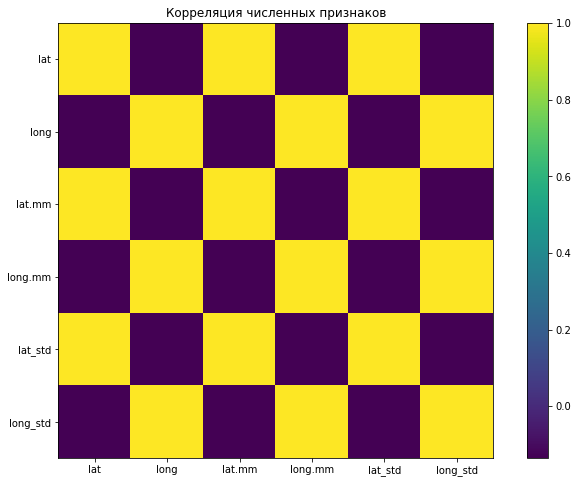

In [46]:
plt.figure(figsize=(12, 8))

columns = data_geografic.corr().columns.tolist()
plt.imshow(data_geografic.corr())

plt.title("Корреляция численных признаков")
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

#### RobustScaler

RobustScalerпреобразует вектор признаков путем вычитания медианы, а затем деления на диапазон между четвертями (значение 75% - значение 25%).

Обратите внимание, что RobustScaler не масштабирует данные в заранее определенный интервал, как MinMaxScaler. Диапазон для каждой функции после применения RobustScaler больше, чем для MinMaxScaler.

Используйте RobustScaler, если вы хотите уменьшить влияние выбросов по сравнению с MinMaxScaler.

#### Normalizer

Нормализатор преобразует все функции в значения от -1 до 1 
Normalizerработает над строками, а не над столбцами! 

По умолчанию нормализация L2 применяется к каждому наблюдению, так что значения в строке имеют единичную норму.Единица нормыс L2 означает, что если бы каждый элемент был возведен в квадрат и суммирован, сумма была бы равна 1.

## Шпаргалки!

- Используйте MinMaxScaler по умолчанию, если вы преобразовываете функцию. Это не искажает.

- Вы можете использовать RobustScaler, если у вас есть выбросы и вы хотите уменьшить их влияние. Тем не менее, вам лучше удалить выбросы.

- Используйте StandardScaler, если вам нужен относительно нормальный дистрибутив.

- Используйте Normalizer экономно - он нормализует строки выборки, а не столбцы объектов. Он может использовать нормализацию l2 или l1.

<img src="pic1.png"></img>

### Признаки на основе дат

Выведем по отдельности колонки `posting_date` и `date`. 

In [48]:
df.date

0       2021-04-17 16:30:50+00:00
1       2021-05-03 19:40:21+00:00
2       2021-04-28 10:52:20+00:00
3       2021-04-17 14:08:57+00:00
4       2021-04-08 19:10:56+00:00
                  ...            
9614    2021-04-10 20:33:57+00:00
9615    2021-05-03 13:36:30+00:00
9616    2021-04-22 19:14:01+00:00
9617    2021-04-14 14:14:42+00:00
9618    2021-04-24 17:50:49+00:00
Name: date, Length: 9619, dtype: object

In [49]:
df[['posting_date', 'date']]

posting_date                       date
0     2021-04-17T12:30:50-0400  2021-04-17 16:30:50+00:00
1     2021-05-03T15:40:21-0400  2021-05-03 19:40:21+00:00
2     2021-04-28T03:52:20-0700  2021-04-28 10:52:20+00:00
3     2021-04-17T10:08:57-0400  2021-04-17 14:08:57+00:00
4     2021-04-08T15:10:56-0400  2021-04-08 19:10:56+00:00
...                        ...                        ...
9614  2021-04-10T16:33:57-0400  2021-04-10 20:33:57+00:00
9615  2021-05-03T09:36:30-0400  2021-05-03 13:36:30+00:00
9616  2021-04-22T12:14:01-0700  2021-04-22 19:14:01+00:00
9617  2021-04-14T09:14:42-0500  2021-04-14 14:14:42+00:00
9618  2021-04-24T13:50:49-0400  2021-04-24 17:50:49+00:00

[9619 rows x 2 columns]

Ранее преобразованная колонка `date` после сохранения в файл и загрузки из него содержит данные в строковом формате, поэтому изменим её тип c помощью `pd.to_datetime`.

In [50]:
data = pd.DataFrame()
data['data'] = pd.to_datetime(df['date'])
data

data
0    2021-04-17 16:30:50+00:00
1    2021-05-03 19:40:21+00:00
2    2021-04-28 10:52:20+00:00
3    2021-04-17 14:08:57+00:00
4    2021-04-08 19:10:56+00:00
...                        ...
9614 2021-04-10 20:33:57+00:00
9615 2021-05-03 13:36:30+00:00
9616 2021-04-22 19:14:01+00:00
9617 2021-04-14 14:14:42+00:00
9618 2021-04-24 17:50:49+00:00

[9619 rows x 1 columns]

Извлечем номер месяца продажи автомобиля

In [58]:
data['month'] = df['posting_date'].apply(lambda x: x[5:7])

Давайте придумаем еще пару методов!

Создадим признак `dayofweek`, обозначающий день недели размещения объявления о продаже автомобиля

In [52]:
data['dayofweek'] = data['data'].dt.weekday
data['dayofweek']

0       5
1       0
2       2
3       5
4       3
       ..
9614    5
9615    0
9616    3
9617    2
9618    5
Name: dayofweek, Length: 9619, dtype: int64

Создадим признак `diff_years`, обозначающий количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля

In [55]:
data['diff_years'] = df[['year']].apply(lambda x: data['data'].dt.year - x)
data['diff_years']

0        1
1        5
2        4
3        8
4        9
        ..
9614    19
9615    13
9616    10
9617     6
9618     4
Name: diff_years, Length: 9619, dtype: int64

Применим стандартизацию к новым признаками и сохраним результат в новые признаки вида month_std.

In [59]:
std_scaler = StandardScaler()

std_scaler.fit(data[['month', 'dayofweek', 'diff_years']])
std_scaled = std_scaler.transform(data[['month', 'dayofweek', 'diff_years']])

print(std_scaled.shape)

data[['month_std', 'dayofweek_std', 'diff_years_std']] = std_scaled

(9619, 3)


In [60]:
data.head(5)

data  dayofweek  diff_years month  month_std  \
0 2021-04-17 16:30:50+00:00          5           1    04  -0.599647   
1 2021-05-03 19:40:21+00:00          0           5    05   1.667649   
2 2021-04-28 10:52:20+00:00          2           4    04  -0.599647   
3 2021-04-17 14:08:57+00:00          5           8    04  -0.599647   
4 2021-04-08 19:10:56+00:00          3           9    04  -0.599647   

   dayofweek_std  diff_years_std  
0       1.120284       -1.322394  
1      -1.374972       -0.695973  
2      -0.376870       -0.852578  
3       1.120284       -0.226157  
4       0.122182       -0.069552